In [ ]:
Вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:
· В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные
· Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, 
а часть – новый. Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. 
Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

In [ ]:
5_task_1:
· id – id клиента в эксперименте
· group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
· events – сколько блюд суммарно было заказано за период

In [ ]:
5_task_2:
· id – id клиента в эксперименте
· segment – сегмент (high/low)
· group – вид кнопки (control – старая версия, test – новая версия)
· events – сколько блюд суммарно было заказано за период

In [59]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import pingouin as pg
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.anova import anova_lm
sns.set(rc={'figure.figsize':(20,7)}, style='whitegrid')

In [2]:
df1 = pd.read_csv('5_task_1.csv')
df2 = pd.read_csv('5_task_2.csv')

In [ ]:
В первом варианте нам подходит дисперсионный анализ, так как признаков, по которым у нас происходит сравнение, больше двух.

In [8]:
A = df1.query('group == "A"').events
B = df1.query('group == "B"').events
C = df1.query('group == "C"').events

In [9]:
# С помощью теста Левена проверяем, равны ли дисперсии
stats.levene(A, B, C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
P-value > 0,05, значит у нас нет оснований отклонять нулевую гипотезу, что дисперсии равны

In [11]:
# Применяем тест Шапиро-Уилка: нормально ли распределены?
stats.shapiro(A.sample(1000, random_state=20))

ShapiroResult(statistic=0.9981869804681871, pvalue=0.36995625365274193)

In [14]:
stats.shapiro(B.sample(1000, random_state=20))

ShapiroResult(statistic=0.9974183390550215, pvalue=0.11367127742114164)

In [13]:
stats.shapiro(C.sample(1000, random_state=20))

ShapiroResult(statistic=0.998320032148749, pvalue=0.44305862450102457)

In [ ]:
Значения p-value для трех групп распределено нормально, так мы не отклоняем нулевую гипотезу.
Для больших значений тест Шапиро-Уилка работает некорректно, поэтому мы берем выборку

In [ ]:
Требования выполнены для теста ANOVA

In [15]:
stats.f_oneway(A,B,C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [ ]:
или

In [22]:
pg.anova(data=df1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [ ]:
Так как p-value меньше 0.05, то мы отклоняем нулевую гипотезу. Значит есть различия в наших группах

In [ ]:
Для нахождения статистически значимых различий у наших групп воспользуемся критерием Тьюки

In [25]:
print(pairwise_tukeyhsd(df1.events, df1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [ ]:
или

In [27]:
MultiComp = MultiComparison(df1.events, df1.group)
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [ ]:
В проведенных тестах мы можем заметить, что у нас отклоняются нулевые гипотезы, а значит статистически значимые различия
есть при каждом сравнении любых двух групп

In [50]:
m1 = A.mean()
m2 = B.mean()
m3 = C.mean()

print(f"Среднее количество заказов для прямоугольной 16:9 картинки - {m1}")
print(f"Среднее количество заказов для квадратной картинки - {m2}")
print(f"Среднее количество заказов для прямоугольной картинки 12:4 - {m3}")

Среднее количество заказов для прямоугольной 16:9 картинки - 29.5796
Среднее количество заказов для квадратной картинки - 37.6136
Среднее количество заказов для прямоугольной картинки 12:4 - 27.4703


In [ ]:
Нарисуем график средних значений для каждой групп

Text(0, 0.5, 'Количество заказанных блюд')

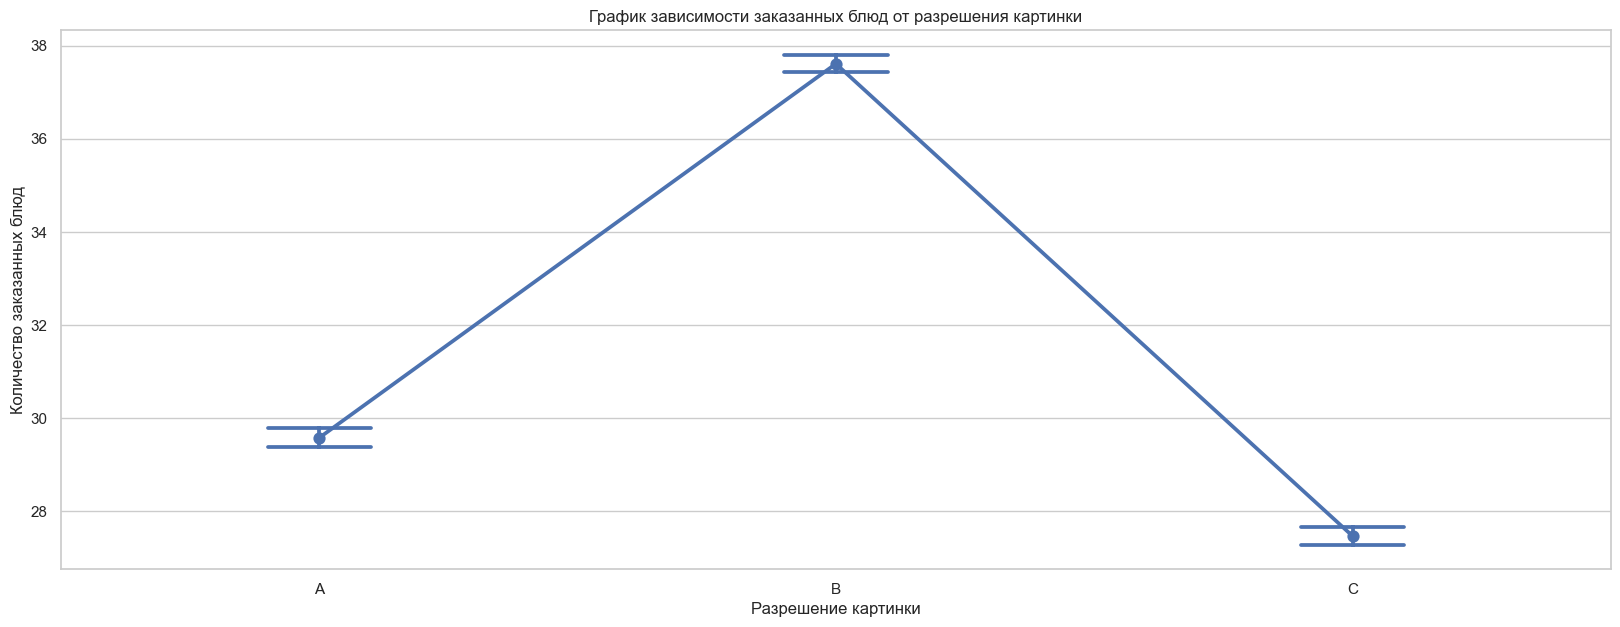

In [34]:
sns.pointplot(df1, x='group', y='events', capsize=0.2)
plt.title('График зависимости заказанных блюд от разрешения картинки')
plt.xlabel('Разрешение картинки')
plt.ylabel('Количество заказанных блюд')

In [ ]:
Вывод: мы выберем квадратные картинки, потому что среднее больше, чем у остальных, и отличается от других качеств картинок

In [ ]:
--------------------------------------------------------------------------------------------

In [ ]:
Для второго варината нам следует использовать многофакторный дисперсионный анализ, так как у нас 2 фактора

In [51]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [66]:
df2['combination'] = df2.group+' \ '+df2.segment

In [67]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [58]:
df2.groupby(['group', 'segment']).events.describe().round(2)

count   mean   std   min   25%   50%   75%    max
group   segment                                                     
control high     10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

In [ ]:
Проводим дисперсионный анализ

In [63]:
formula = 'events ~ group + segment + group:segment'
model = smf.ols(formula, df2).fit()
aov_table = anova_lm(model, typ = 2)
print(np.round(aov_table, 2))

                    sum_sq       df          F  PR(>F)
group           3837195.41      1.0  112031.86     0.0
segment        23624796.65      1.0  689756.38     0.0
group:segment     36642.44      1.0    1069.82     0.0
Residual        3424955.89  99996.0        NaN     NaN


In [ ]:
или

In [69]:
pg.anova(df2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [ ]:
p-значения для группы, сегмента и их взаимодействия меньше 0.05, значит оказывают статистически значимое влияние 
на количество заказов

In [68]:
print(pairwise_tukeyhsd(df2['events'], df2['combination']).summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392   0.0 -40.1073 -39.7711   True
control \ high   test \ high   9.9677   0.0   9.7551  10.1803   True
control \ high    test \ low -26.9449   0.0  -27.113 -26.7768   True
 control \ low   test \ high  49.9069   0.0  49.7388   50.075   True
 control \ low    test \ low  12.9944   0.0   12.888  13.1007   True
   test \ high    test \ low -36.9126   0.0 -37.0807 -36.7445   True
--------------------------------------------------------------------


In [ ]:
отклоняем нулевую гипотезу

In [ ]:
Визуализируем результаты теста

Text(0, 0.5, 'Количество заказанных блюд')

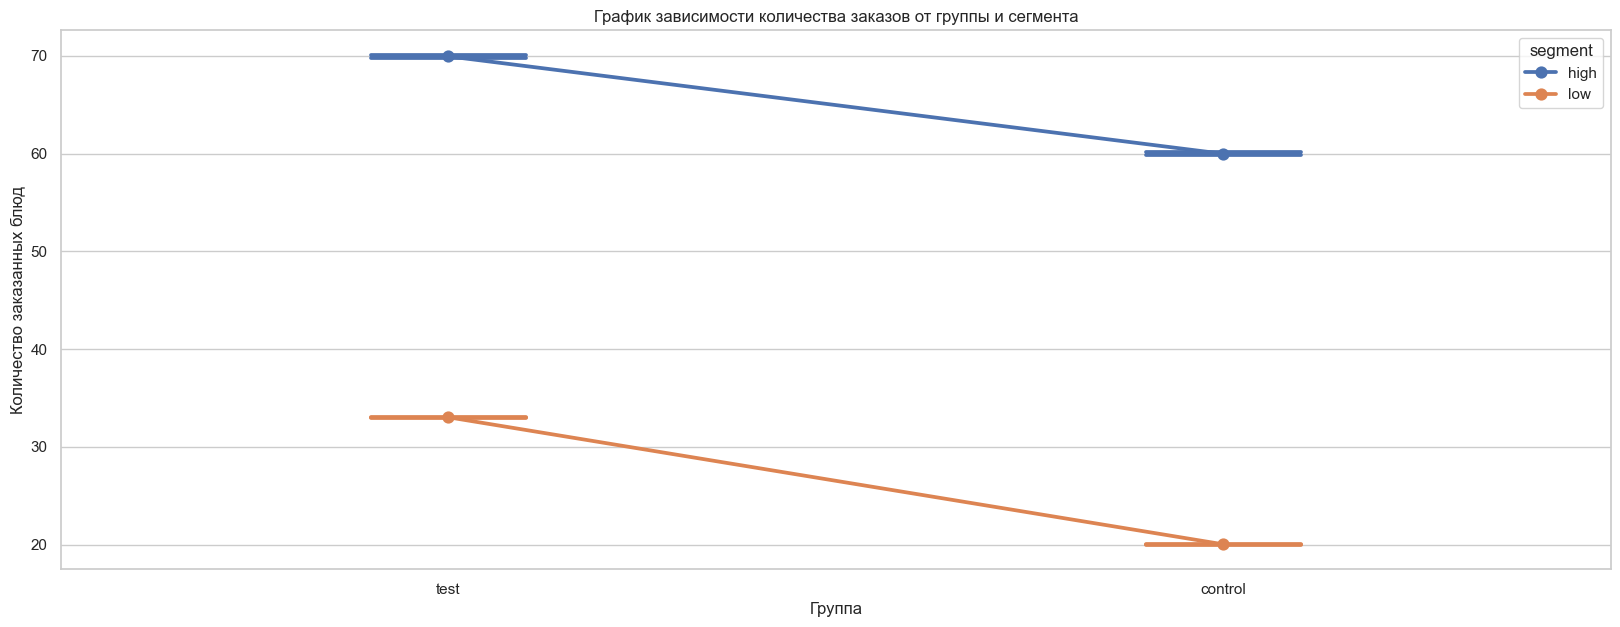

In [74]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data=df2, capsize=0.2)
plt.title('График зависимости количества заказов от группы и сегмента')
plt.xlabel('Группа')
plt.ylabel('Количество заказанных блюд')

Text(0, 0.5, 'Количество заказанных блюд')

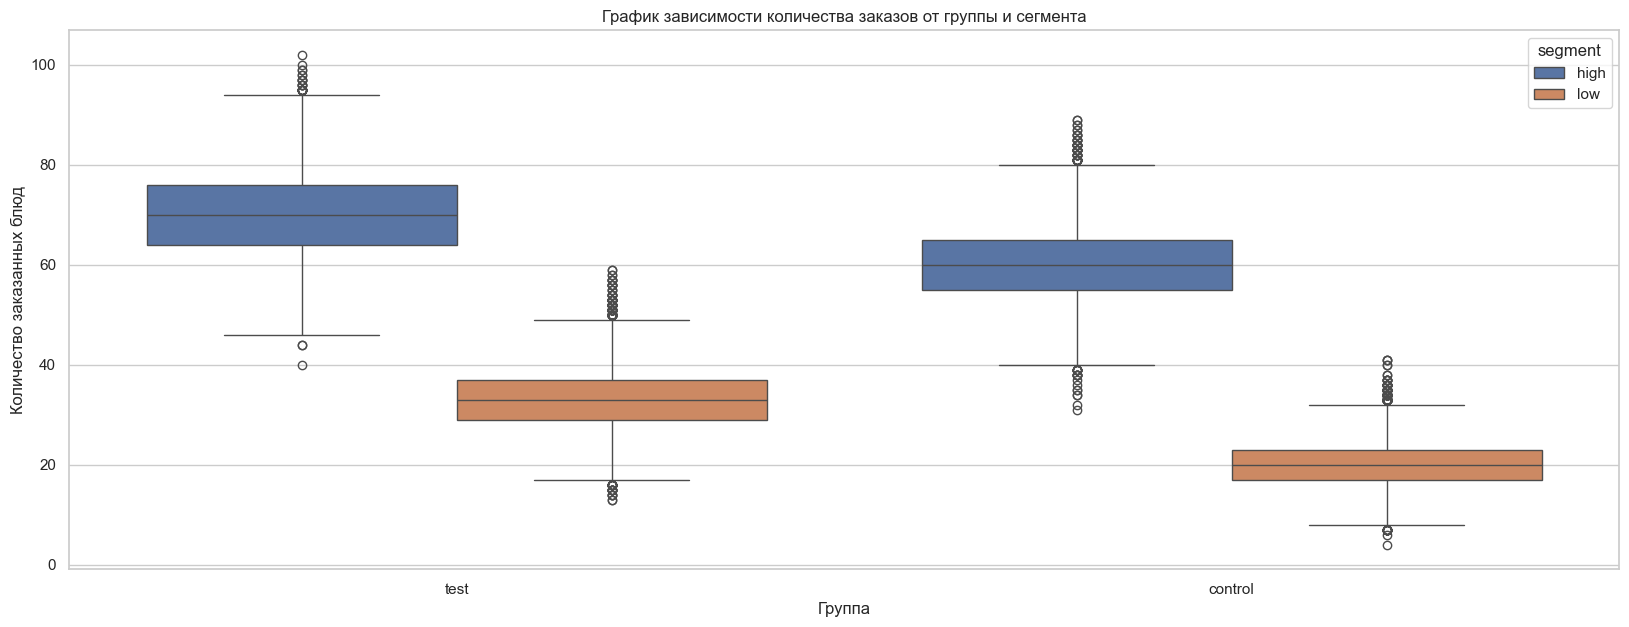

In [76]:
sns.boxplot(x = 'group', y = 'events', hue = 'segment', data=df2)
plt.title('График зависимости количества заказов от группы и сегмента')
plt.xlabel('Группа')
plt.ylabel('Количество заказанных блюд')

In [ ]:
Вывод: факторы group, segment и их взаимодействие оказались значимыми. Среднее увеличивается во всех случаях увеличивается,
значит новая версия хорошо показала себя!